## Deep learning

#### 벡터

|x|: 스칼라(실수)의 절대값

‖v‖: 벡터의 크기 (또는 길이, 노름(norm)) : ‖v‖ = √(x² + y²)


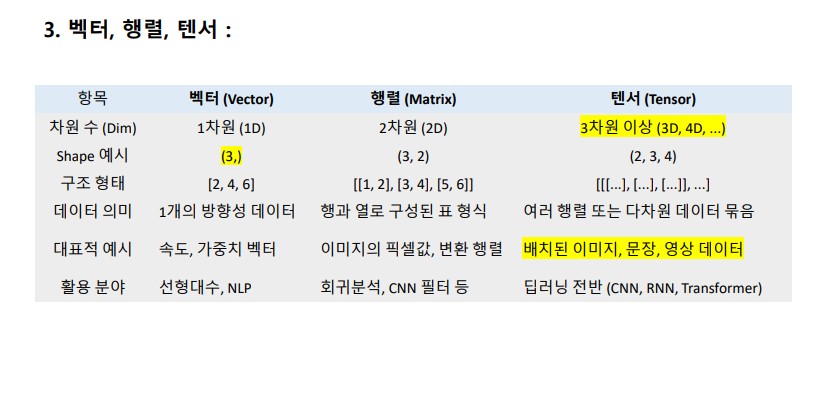

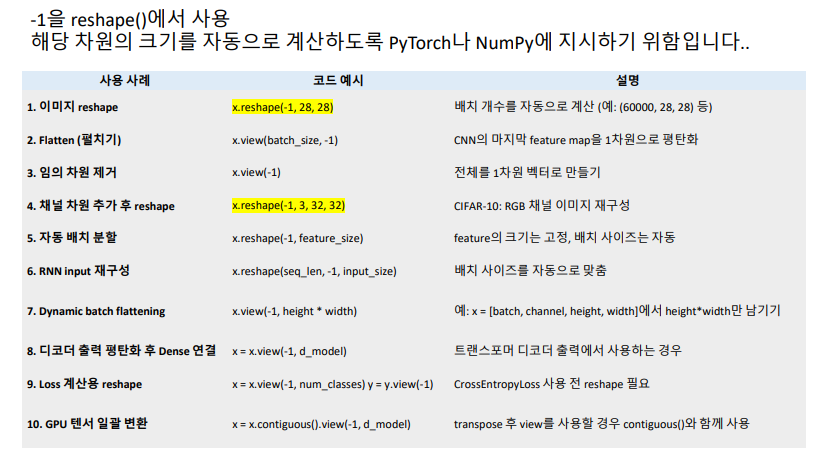

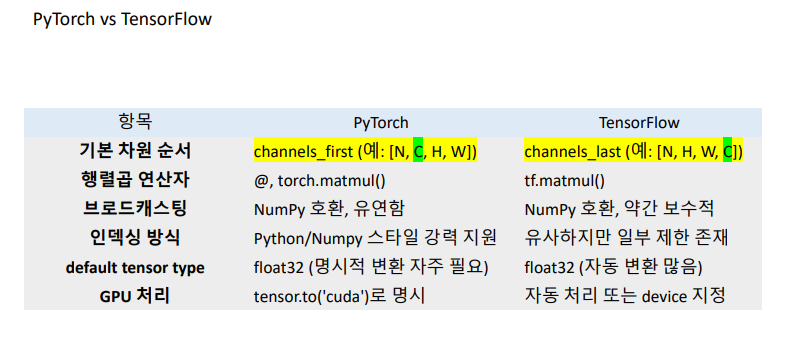


##### 내적 : 두 벡터의 유사성을 측정하는 기준
- 두 벡터의 각도 값(cosine)을 곱함으로써 방향에 대한 유사성을 포함하게 된다.
- Cosine 유사도
- - 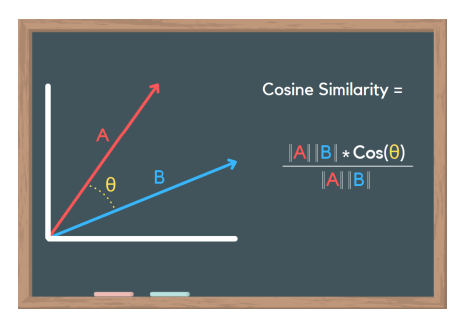
- - 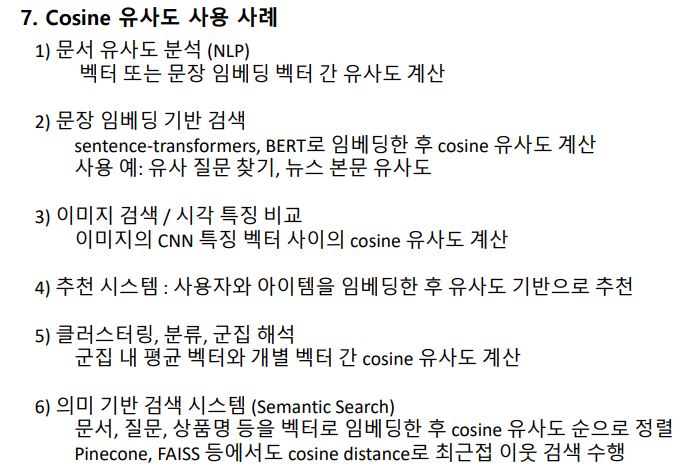


##### Regularization : 규제화
- 과적합을 막기 위해 모델의 복잡도를 제한하는 것

##### Normalization : 정규화
- 입력 데이터의 스케일을 맞추는 것

순전파와 역전파
- 모델의 예상 결과와 실제 결과의 차이(Loss)를 옵티마이저를 통해 최적화하는 과정(Feed forward, back propagation)

에포크 (epochs) 
- 준비된 데이터가 한 번씩 순전파(forward pass)와 역전파(backward pass)를 통해 학습되는 과정을 포함
- 이 과정을 통해 모델의 가중치가 업데이트되고, 에포크를 반복하여 모델의 성능을 향항
- **에포크의 수는 학습의 반복 횟수이며, 학습 시간과 모델의 성능에 큰 영향을 준다.**

최적화 (Optimization)
- 목적함수(손실함수)의 최솟값이나 최댓값을 찾는 과정 (경사하강법)

### 경사하강법 (Gradient Descent)
- 최적화 알고리즘 중 가장 기본적이고 널리 사용되는 방법
- 경사하강법을 눈감고 산 내려가는 걸로 이해하기

------------------------------------------------------
1. 목표: 오차(Loss)를 줄이는 최적의 가중치 찾기
------------------------------------------------------

용어 비유 정리

- 가중치 (weight):           발 디딤 방향
- 순전파 (forward):          눈 감고 한 발 내딛기 (예측 계산)
- 오차 (loss):               미끄러짐 정도 (예측과 실제 차이)
- 역전파 (backpropagation):  발 미끄러짐이 몸 전체로 전해짐 (오차 전달)
- 미분 (gradient):           경사도 측정기 (어느 방향이 가파른지)
- 체인룰 (chain rule):       발 → 발목 → 무릎 → 몸으로 전달 (층마다 연결된 미분)
- 경사하강법:                더 안전한 방향으로 발 디디기 반복

------------------------------------------------------
2. 전체 흐름 비유로 이해하기
------------------------------------------------------

(1) 순전파
 - 눈 감고 한 발 내디딤
 - → 입력 데이터를 넣고 계산해서 예측값을 만듦

(2) 오차 계산
 - 발이 미끄러짐(= 예측이 틀렸다는 뜻)
 - → 예측이 실제값과 얼마나 다른지 확인

(3) 역전파
 - 발 미끄러짐이 무릎과 온몸에 전해짐
 - → 오차를 거꾸로 각 층에 전달

(4) 미분
 - 어디로 더 내려가야 미끄러지지 않을까?
 - → 오차가 줄어드는 방향을 기울기로 측정

(5) 체인룰
- 발에서 시작한 변화가 관절들을 거쳐 계산됨
 - → 여러 층이 연결돼 있을 때 미분을 연결해서 계산

(6) 가중치 업데이트
 - 다음엔 덜 미끄러운 방향으로 발 디딤
 - → 기울기를 따라 가중치(방향) 살짝 조정

(7) 반복
 - 이 과정을 수천 번 반복(= 드디어 산 아래 도착)
 - → 결국 가장 낮고 안전한 지점(오차 최소 지점)에 도착

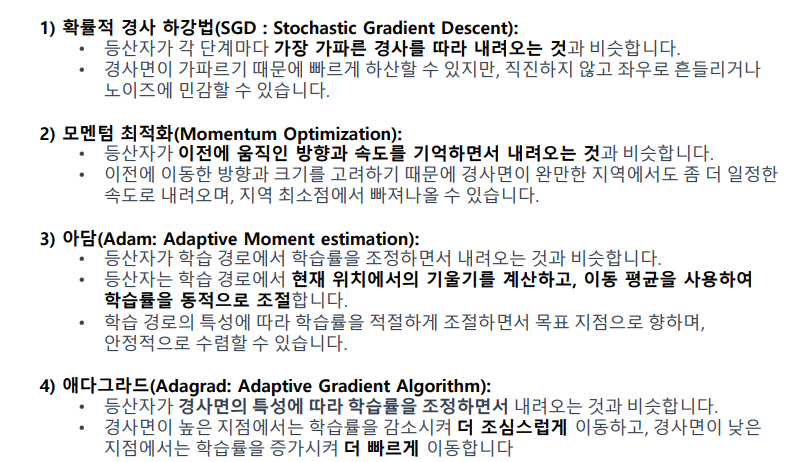


활성화 함수
- 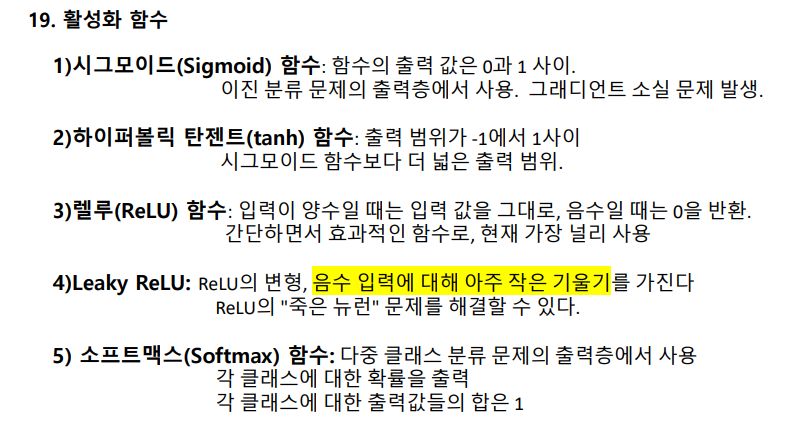


In [ ]:
import torch

# 열벡터와 행벡터의 정의

# 열벡터
v = torch.tensor([[2], [3]]) # shape : (2, 1)
print(f"열벡터 v : {v}, shape : {v.shape}")

# 행벡터
w = torch.tensor([[4, 5]]) # shape : (1, 2)
print(f"행벡터 w : {w}, shape : {w.shape}")

c:\Users\main\miniconda3\envs\dl\Lib\site-packages\torch\_subclasses\functional_tensor.py:276: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:81.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


열벡터 v : tensor([[2],
        [3]]), shape : torch.Size([2, 1])
행벡터 w : tensor([[4, 5]]), shape : torch.Size([1, 2])


In [ ]:
# 행렬곱

# 행렬 A
A = torch.tensor([[1, 2], [3, 4]]) # shape : (2, 2)
print(f"행렬 A : {A}, shape : {A.shape}")

# 행렬곱 A @ V
y = A @ v
print(f"행렬곱 A @ v : {y}, shape : {y.shape}")

행렬 A : tensor([[1, 2],
        [3, 4]]), shape : torch.Size([2, 2])
행렬곱 A @ v : tensor([[ 8],
        [18]]), shape : torch.Size([2, 1])


In [ ]:
# 행벡터와 열벡터의 내적

# 내적 w @ v
inner_product = w @ v
print(f"내적 w @ v : {inner_product}, shape : {inner_product.shape}")

내적 w @ v : tensor([[23]]), shape : torch.Size([1, 1])


In [ ]:
# 1차원 배열의 모호성

# 1차원 배열
u = torch.tensor([2, 3]) # shape (2,)
print(f"1차원 배열 u : {u}, shape : {u.shape}")

# A @ u (PyTorch가 u를 열벡터로 해석)
y_u = A @ u
print(f"A @ u : {y_u}, shape : {y_u.shape}")

# 명시적 열벡터로 변환
u_column = u.unsqueeze(1) # shape (2, 1)
print(f"명시적 열벡터 u_column : {u_column}, shape : {u_column.shape}")

y_u_column = A @ u_column
print(f"A @ u_column : {y_u_column}, shape : {y_u_column.shape}")


1차원 배열 u : tensor([2, 3]), shape : torch.Size([2])
A @ u : tensor([ 8, 18]), shape : torch.Size([2])
명시적 열벡터 u_column : tensor([[2],
        [3]]), shape : torch.Size([2, 1])
A @ u_column : tensor([[ 8],
        [18]]), shape : torch.Size([2, 1])


In [ ]:
# 주의 : 행벡터와 행렬곱

# w @ A
result_wA = w @ A
print(f"w @ A : {result_wA}, shape : {result_wA.shape}")

w @ A : tensor([[19, 28]]), shape : torch.Size([1, 2])


### ANN (Arifitial Neural Network)
- 입력 데이터를 받아 가중치와 활성화 함수를 통해 출력을 생성하는 계층으로 구성
- Fully Connected Layer로 이루어져 있다.
- - Fully Connected Layer(완전 연결층)
- - - 모든 입력 뉴런과 출력 뉴런이 서로 연결되어 있는 층
- - - 각 뉴런 사이의 연결은 선형 연산과 활성화 함수를 거쳐 진행된다
- - - 각 입력 뉴런은 출력 뉴런과 가중치로 연결되어 있으며, 이 가중치는 학습 과정에서 조정

- 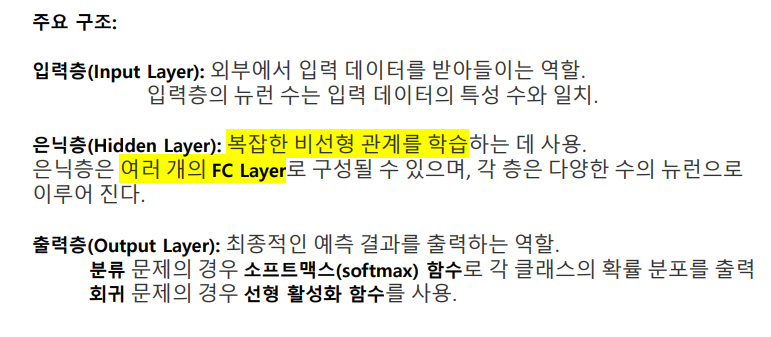

### ANN vs CNN

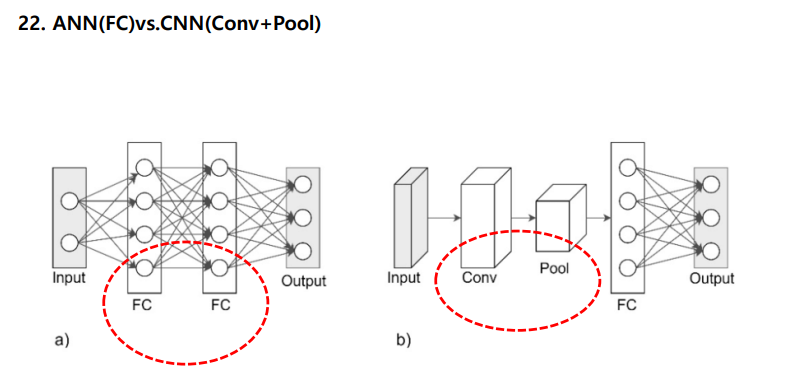

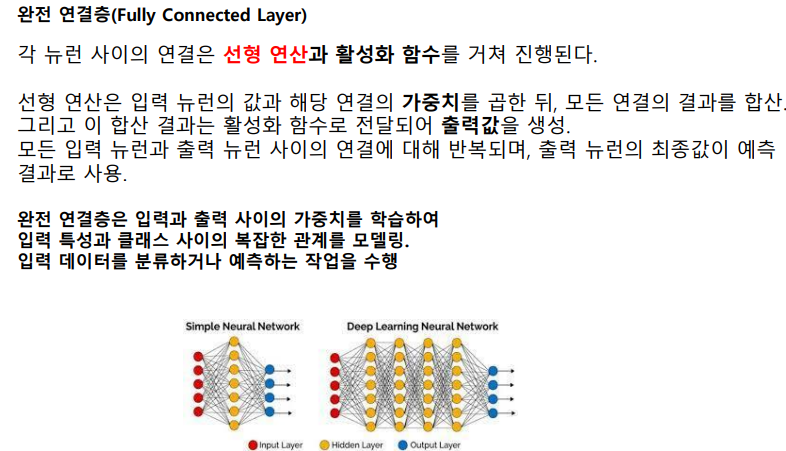

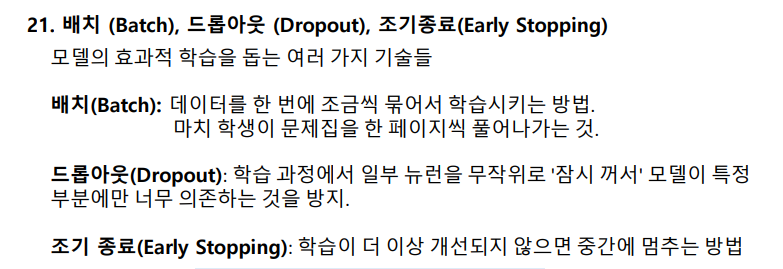

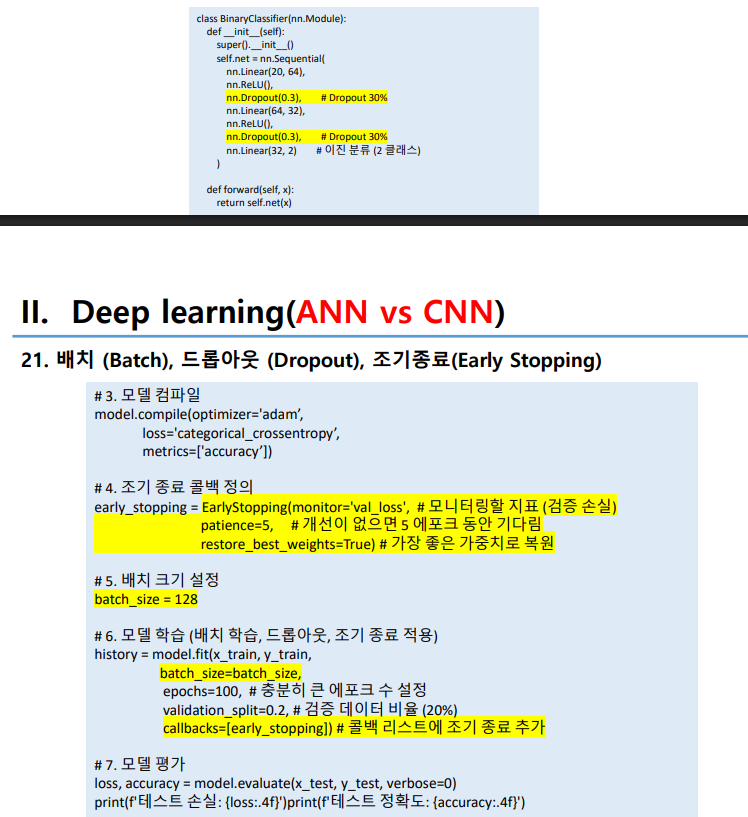


<hr>

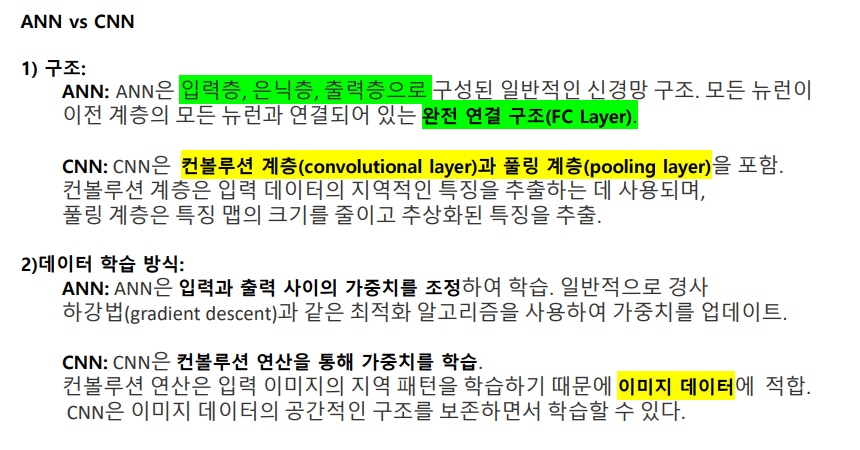

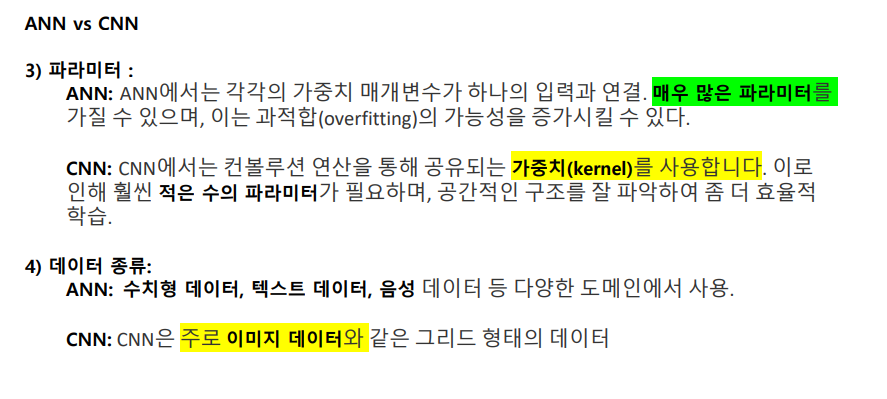

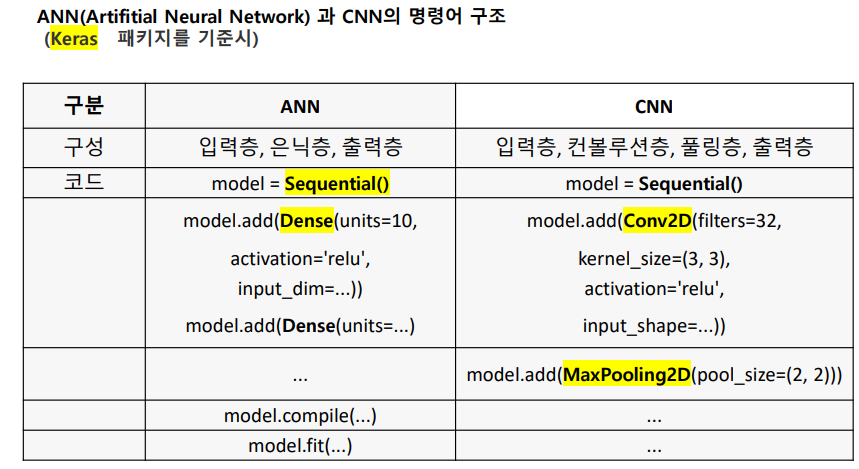

### CNN (Convolution Neural Network)
- 합성곱신경망
- 특히 이미지 및 비디오 처리에 활용
- 핵심 요소는 커널이라는 필터
- Convolution과 Pooling 과정으로 진행

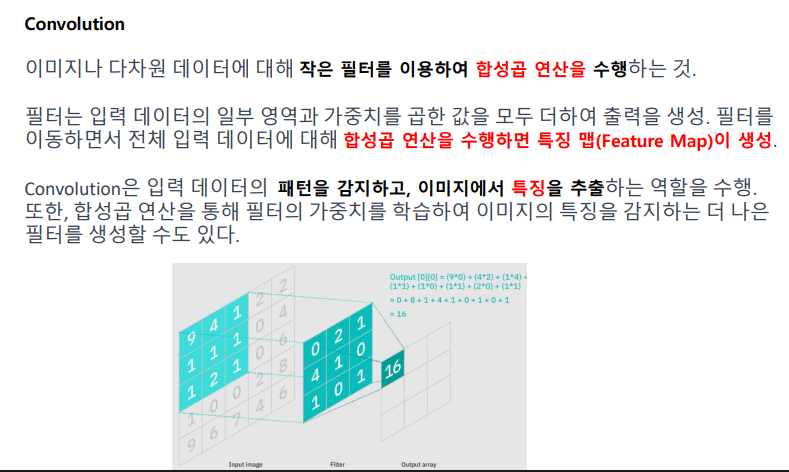

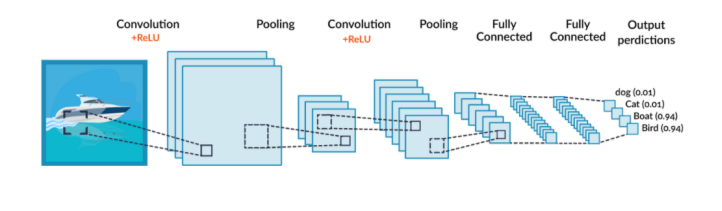

목적 함수 :
- 비용함수

- 손실함수
- - 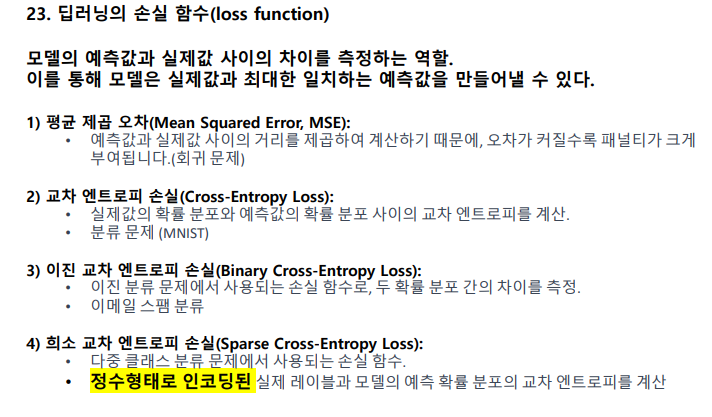

- 오차함수
- - 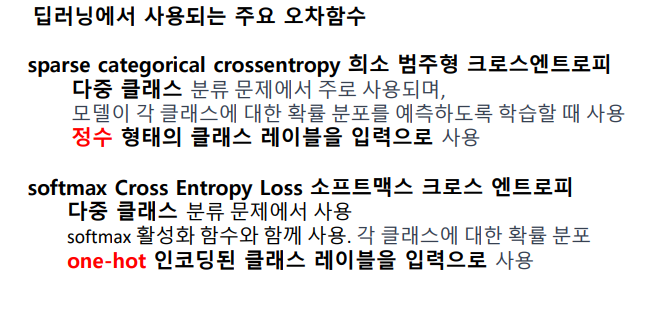

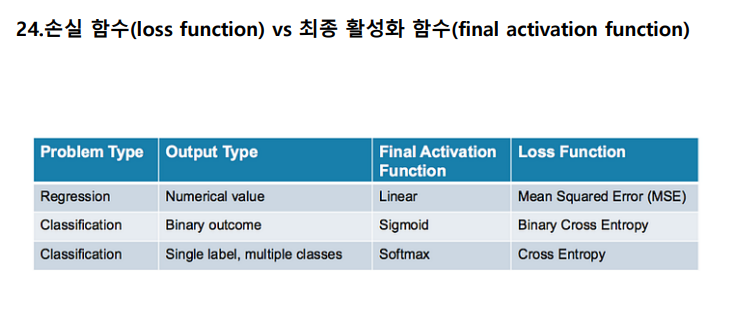

자연어처리 역사 (RNN > Transformer)
### RNN (Recurrent Neural Network)
- 시퀀스 데이터를 처리하는 첫 딥러닝 구조
- 순차적으로 입력받고, 은닉 상태로 이전 정보를 기억
- 단점 : 장기 의존성 문제 = 앞쪽 정보가 뒤로 갈수록 사라짐

LSTM / GRU
- 기억 게이트를 도입해 중요 정보는 오래 기억, 덜 중요한 건 잊음 (RNN의 장기 의존성 문제 완화)
- 단점 : 문장 전체를 하나의 벡터에 담는 구조는 여전히 유지 = 정보 압축 손실, 여전히 순차 처리만 가능

Seq2Seq (Encoder-Decoder)
- Encoder가 전체 입력 시 시퀀스를 벡터로 압축
- Decoder는 그 벡터를 보고 출력 시퀀스를 생성
- 단점 : 고정된 context 벡터에 전체 정보를 압축하려다보니, 긴 문장에서는 성능 급감

Seq2Seq + Attention
- Decoder가 출력 단어를 예측할 때 입력 단어 전체에 다른 가중치를 부여
- Q = Decoder 상태, K/V = Encoder 상태 -> 중요 단어에 집중 가능
- 단점 : 여전히 순차 처리 기반 (RNN 구조) = 느림

Transformer (self attention)
- Encoder/Decoder 모두 Self-Attention + Feedforward 구성
- Positional Encoding으로 순서 정보 보완

- 장점 : 
- - 병렬 처리 가능 -> 학습 속도 비약적 증가
- - 문장 내 모든 단어 간 관계를 한 번에 계산
- - 긴 문장에서도 성능 우수

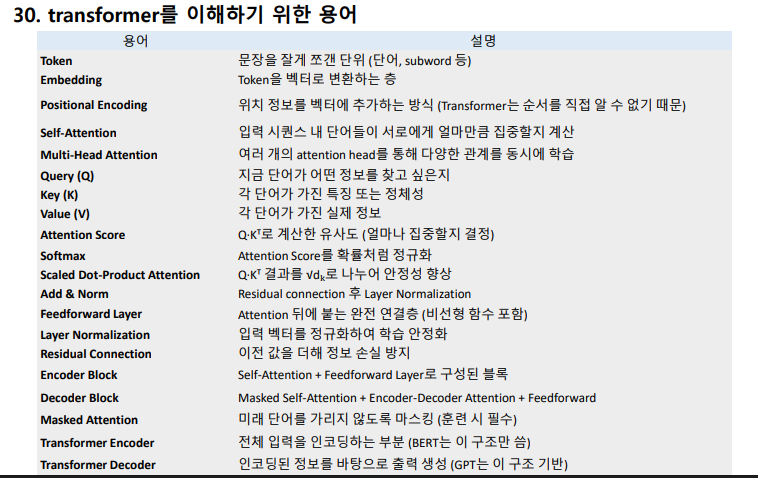

### Transfer Learning

### Object Detection (YOLO)

### 활성화 함수

* Softmax
- 활성화 함수의 한 종류로, 신경망의 출력층에서 분류 문제를 해결할 때 사용
- 출력되는 모든 값은 0과 1사이의 확률값으로 모든 클래스의 확률 합이 1

## DNN (Deep Neural Network, 심층 신경망)
- 은닉층이 2개 이상인 신경망
- Hidden Layer (은닉층)
- - 신경망 내부에서 연산 수행, 직접 불 수 없음.
- - 데이터 추상화, 비선형성을 추가하여 복잡한 문제를 해결
- - 은닉층이 없으면 단순한 선형 모델이 되어, 현실 세계의 복잡한 문제를 해결 불가

- 역전파 알고리즘으로 학습
- 경사하강법으로 에러를 최소화
- DNN을 응용하여 CNN, RNN, LSTM, GRU 발전



### Keras

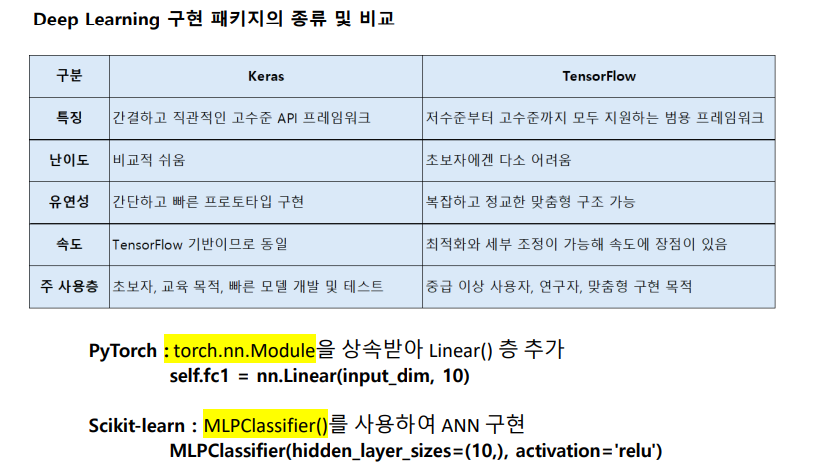

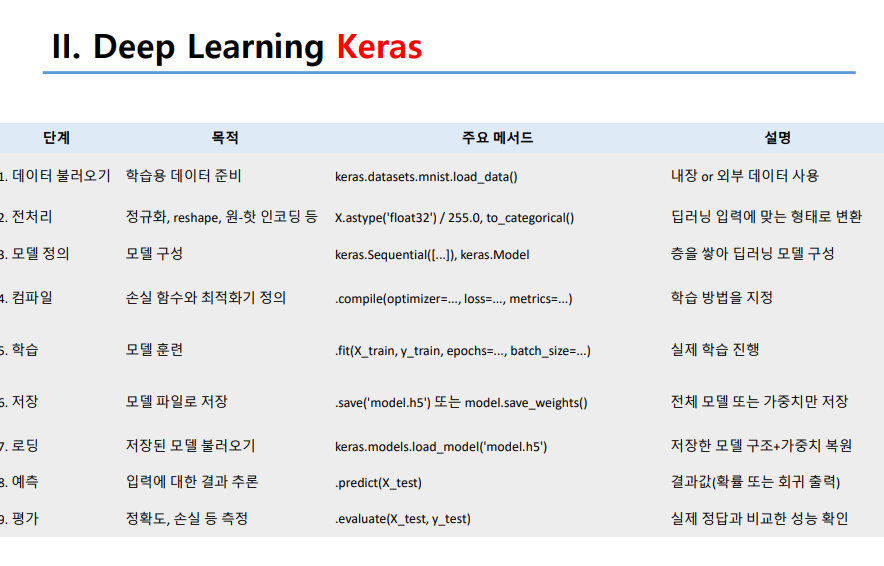

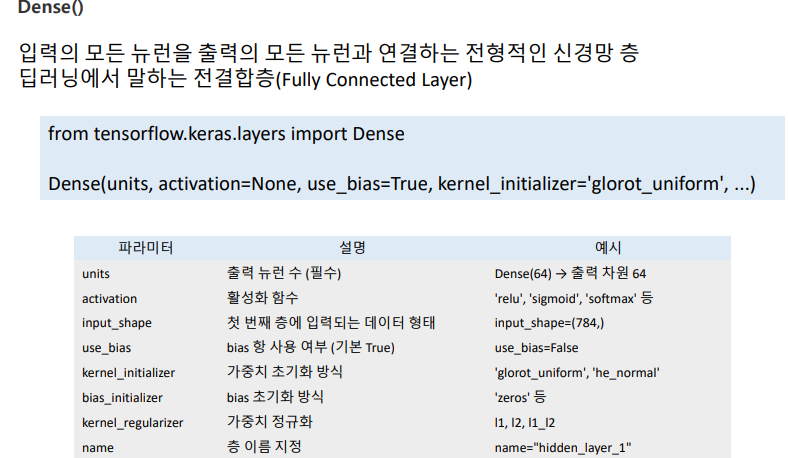

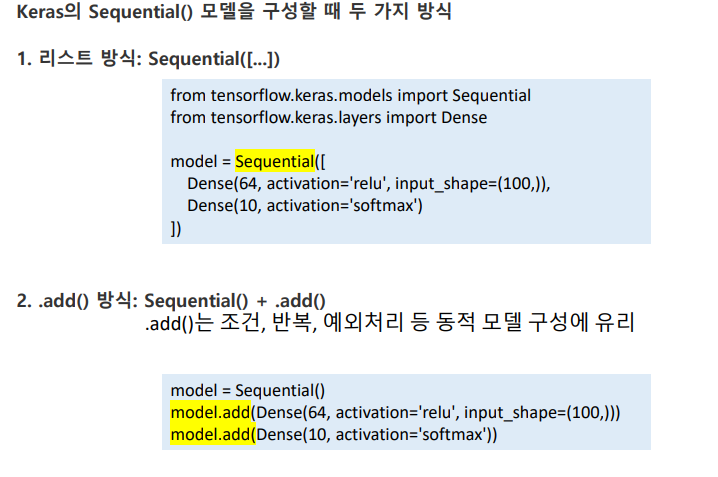

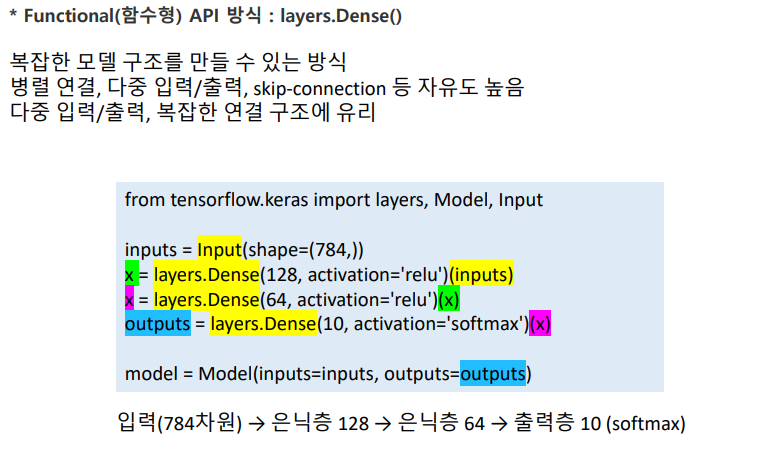

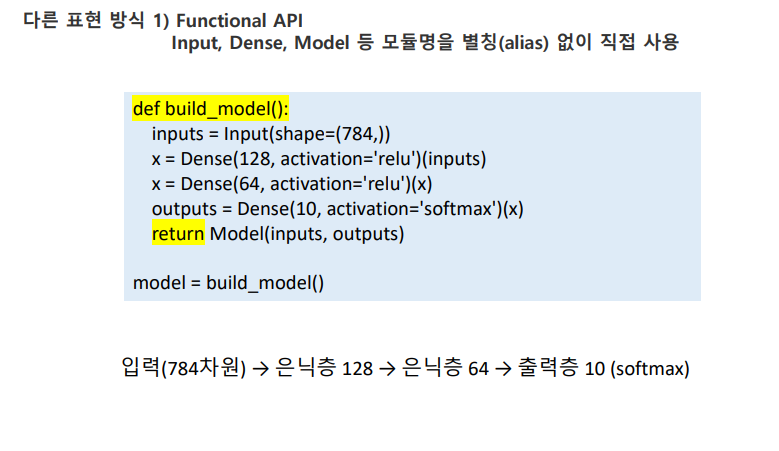

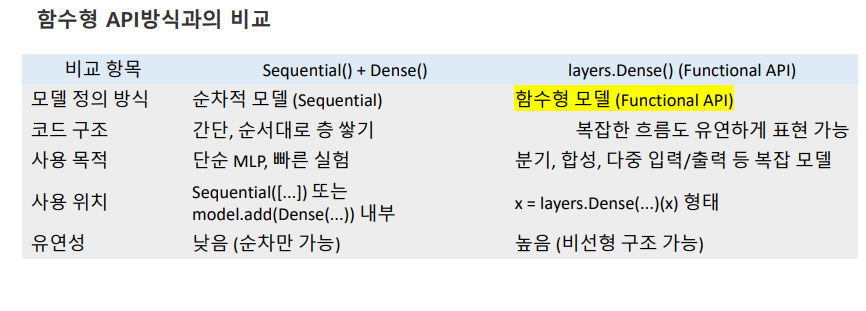

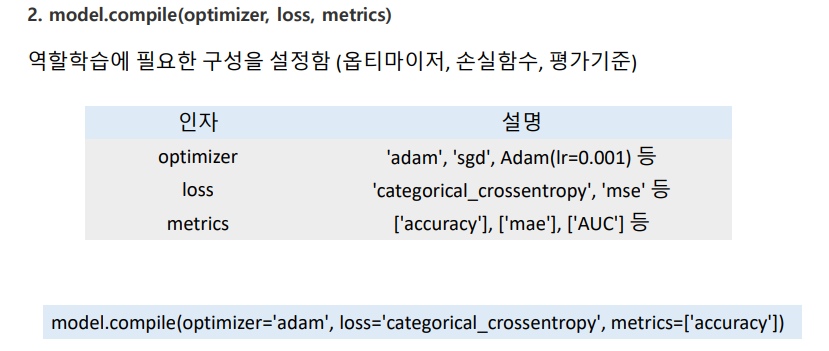

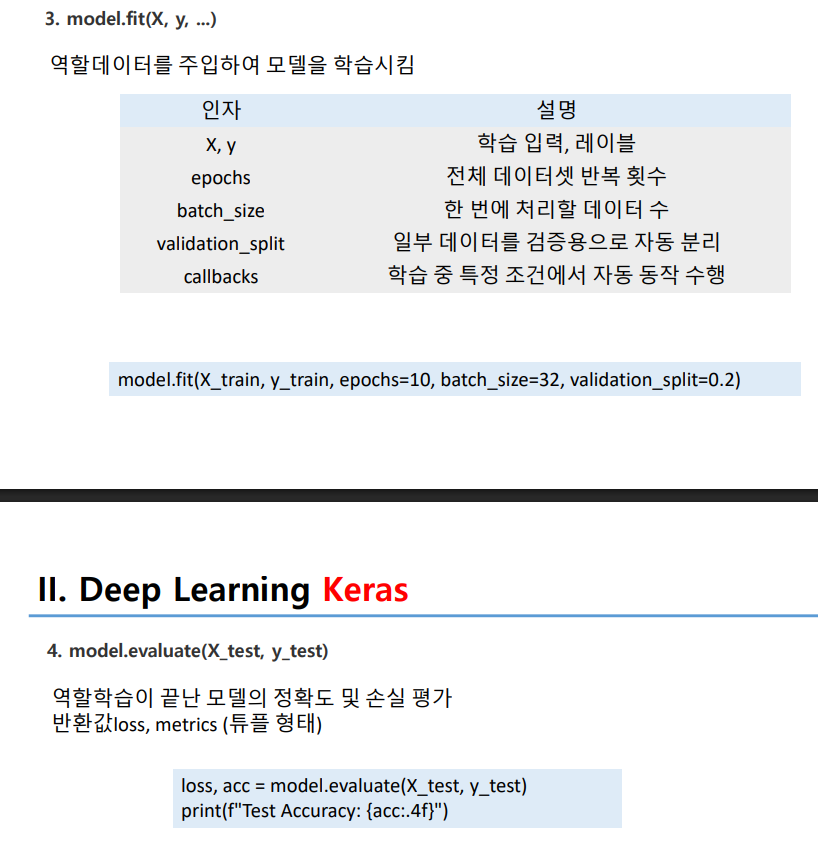

.
.
.